In [4]:
#import os

DATASET_PATH = "Bone_Fracture_Binary_Classification"

# Count images in each category
for split in ["train", "val", "test"]:
    for category in ["fractured", "not fractured"]:
        path = os.path.join(DATASET_PATH, split, category)
        num_images = len(os.listdir(path))
        print(f"{split}/{category}: {num_images} images")


train/fractured: 4606 images
train/not fractured: 4640 images
val/fractured: 337 images
val/not fractured: 492 images
test/fractured: 238 images
test/not fractured: 268 images


In [2]:
#import glob

# Get sample filenames
sample_files = glob.glob(os.path.join(DATASET_PATH, "train", "fractured", "*"))[:5]
print("Sample Filenames:")
for f in sample_files:
    print(f)


Sample Filenames:
Bone_Fracture_Binary_Classification/train/fractured/63.jpg
Bone_Fracture_Binary_Classification/train/fractured/91-rotated3-rotated1-rotated1 - Copy (1).jpg
Bone_Fracture_Binary_Classification/train/fractured/81-rotated1-rotated2-rotated2.jpg
Bone_Fracture_Binary_Classification/train/fractured/2-rotated1-rotated1 - Copy (1).jpg
Bone_Fracture_Binary_Classification/train/fractured/189.jpg


In [ ]:
import cv2
import matplotlib.pyplot as plt

print("✅ OpenCV and Matplotlib are installed correctly!")


Matplotlib is building the font cache; this may take a moment.


✅ OpenCV and Matplotlib are installed correctly!


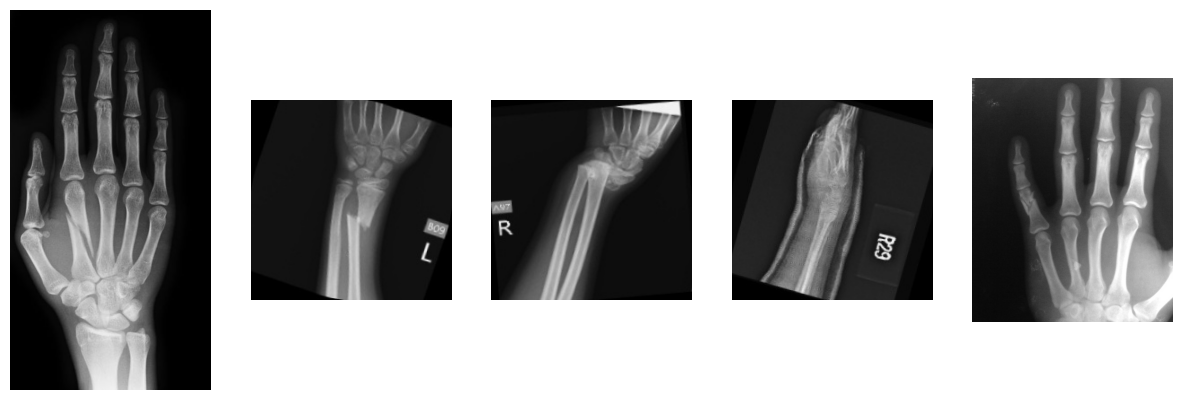

In [10]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, file in enumerate(sample_files[:5]):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (for proper display)
    axes[i].imshow(img)
    axes[i].axis("off")
plt.show()

In [12]:
# Function to get image dimensions
def get_image_dimensions(image_paths):
    dimensions = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        if img is not None:  # Ensure the image is valid
            dimensions.append(img.shape[:2])  # (height, width)
    return dimensions

# Collect image sizes
sample_images = sample_files[:10]  # Check first 10 images
image_sizes = get_image_dimensions(sample_images)

# Print results
for i, size in enumerate(image_sizes):
    print(f"Image {i+1}: {size}")

Image 1: (751, 396)
Image 2: (224, 224)
Image 3: (224, 224)
Image 4: (224, 224)
Image 5: (585, 480)


In [13]:
#from collections import Counter

# Check dimensions for all train images
all_image_paths = glob.glob(os.path.join(DATASET_PATH, "train", "fractured", "*")) + \
                  glob.glob(os.path.join(DATASET_PATH, "train", "not fractured", "*"))

# Get all unique image sizes
all_sizes = get_image_dimensions(all_image_paths)
size_counts = Counter(all_sizes)

# Print out the most common image sizes
print("Unique image sizes and their counts:")
for size, count in size_counts.most_common(10):  # Show top 10 most common sizes
    print(f"Size {size}: {count} images")


libpng warning: bKGD: invalid
libpng warning: bKGD: invalid
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: bKGD: invalid
libpng warning: iCCP: known incorrect sRGB profile
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file


Unique image sizes and their counts:
Size (224, 224): 8538 images
Size (454, 373): 49 images
Size (2880, 2304): 39 images
Size (373, 454): 11 images
Size (100, 100): 11 images
Size (1693, 1353): 9 images
Size (2920, 2320): 8 images
Size (380, 285): 7 images
Size (442, 442): 6 images
Size (2021, 1099): 6 images


In [ ]:
#import os
#import cv2
#import glob
import numpy as np
from tqdm import tqdm  # Progress bar

# Define paths
RAW_DATA_DIR = "Bone_Fracture_Binary_Classification"
OUTPUT_DIR = "preprocessed_dataset"
TRAIN_DIR = os.path.join(OUTPUT_DIR, "train")
TEST_DIR = os.path.join(OUTPUT_DIR, "test")
VAL_DIR = os.path.join(OUTPUT_DIR, "val")

# Image size for Faster R-CNN (fixed resolution)
IMG_SIZE = (512, 512)

# Create output directories
os.makedirs(TRAIN_DIR + "/fractured", exist_ok=True)
os.makedirs(TRAIN_DIR + "/not fractured", exist_ok=True)
os.makedirs(TEST_DIR + "/fractured", exist_ok=True)
os.makedirs(TEST_DIR + "/not fractured", exist_ok=True)
os.makedirs(VAL_DIR + "/fractured", exist_ok=True)
os.makedirs(VAL_DIR + "/not fractured", exist_ok=True)

# Function to preprocess images
def preprocess_and_save_images(input_folder, output_folder):
    """Resizes and normalizes images, skipping corrupted files."""
    image_paths = glob.glob(os.path.join(input_folder, "*"))
    
    for img_path in tqdm(image_paths, desc=f"Processing {input_folder}"):
        try:
            img = cv2.imread(img_path)
            
            if img is None:
                print(f"Skipping unreadable image: {img_path}")
                continue  # Skip unreadable images

            img_resized = cv2.resize(img, IMG_SIZE)  # Resize
            img_normalized = img_resized / 255.0  # Normalize (scale to 0-1)
            
            # Save image
            output_file = os.path.join(output_folder, os.path.basename(img_path))
            cv2.imwrite(output_file, (img_normalized * 255).astype(np.uint8))  # Convert back to 0-255

        except Exception as e:
            print(f"Error processing {img_path}: {e}")

# Apply preprocessing
for split in ["train", "test", "val"]:
    for category in ["fractured", "not fractured"]:
        preprocess_and_save_images(
            os.path.join(RAW_DATA_DIR, split, category),
            os.path.join(OUTPUT_DIR, split, category)
        )

print("✅ Preprocessing complete! Check the 'preprocessed_dataset' folder.")
